<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/09w_A_mon_0512_easy_ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9주차 수업

## 결측값 제거

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"sex" : ['M', 'F', np.nan, 'M',' F',],
                   "score" : [5, 4, 3, 4, None]})

df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis = 0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [7]:
df.dropna(axis = 1)

""
0
1
2
3
4


In [8]:
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df.dropna(subset=['score'], axis = 0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
df_no = df.dropna(subset=['score'])
df_no

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [11]:
df_no['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [12]:
df_no = df.dropna(subset=['score', 'sex'])
df_no

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [13]:
df.score.mean()

np.float64(4.0)

In [14]:
df['score'].mean()

np.float64(4.0)

In [18]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score','sum')).dropna()

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [22]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            np.nan]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [23]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [24]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [25]:
df.dropna(axis = 1)

,name
0,Alfred
1,Batman
2,Catwoman


In [26]:
df.dropna(axis = 'columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [27]:
df.dropna(axis = 'index')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [28]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [29]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [30]:
df.dropna(thresh = 2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [31]:
df.dropna(thresh = 3) #정상적인 값의 개수

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [32]:
df.dropna(subset=['name']) #name 열에 결측치가 있다면

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [33]:
df.dropna(subset=['name', 'toy']) #name, toy 열에 결측치가 있다면

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [34]:
df.dropna(subset=['born']) #born 열에 결측치가 있다면

,name,toy,born
1,Batman,Batmobile,1940-04-25


## 빈 데이터프레임 확인하는 방법, df.empty (속성임)

In [35]:
df = pd.DataFrame()

In [36]:
df.empty

True

In [37]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [38]:
df1.empty

True

In [39]:
df1 = pd.DataFrame(columns = ['col1', 'col2', 'col3'])
df1

,col1,col2,col3


In [40]:
df1.empty

True

In [41]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [42]:
df1.empty

False

In [43]:
df1 = pd.DataFrame(np.nan, index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [44]:
df1 = pd.DataFrame(100, index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3']) # data = 100,
df1

,col1,col2,col3
row1,100,100,100
row2,100,100,100
row3,100,100,100


In [45]:
df1.empty

False

In [48]:
df1.empty

False

## 결측값 대체

In [49]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 2.17 MiB | 3.84 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [53]:
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [60]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [63]:
exam.isna().sum().sum()

np.int64(3)

In [65]:
exam.loc[[2,7,14], ['math']]

,math
2,NaN
7,NaN
14,NaN


## 결측값 채워넣기

In [66]:
exam['math'] = exam['math'].fillna(100)

In [69]:
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [71]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [72]:
exam['math'] = exam['math'].fillna(exam.math.mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [75]:
pd.set_option('display.precision',2)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [77]:
exam.isna().sum()

,0
id,0
nclass,0
math,0
english,0
science,0


In [92]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [93]:
df.sex.value_counts()

,count
sex,
1,3
2,2
3,1


In [94]:
df.sex.value_counts().sort_index() #index 기준 정렬

,count
sex,
1,3
2,2
3,1


In [95]:
df.sex.value_counts().sort_values() #value 기준 정렬

,count
sex,
3,1
2,2
1,3


In [96]:
df.score.value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [97]:
df.score.value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [98]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex']) #대충 3항 연산자 비슷한거
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [99]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score']) #대충 3항 연산자 비슷한거
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [100]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [102]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [103]:
# ㅍ_ㅍ -_-

In [104]:
df.dropna().groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [106]:
df = pd.DataFrame([1])
df

,0
0,1


In [107]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [108]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [109]:
df = pd.DataFrame([[1, 1, 2, 2],[10, 20, 30, 40]])
df

,0,1,2,3
0,1,1,2,2
1,10,20,30,40


In [110]:
df = pd.DataFrame({'x1' :[1, 1, 2, 3]})
df

,x1
0,1
1,1
2,2
3,3


In [111]:
df['x2'] = np.where (df.x1 == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,3,NaN


In [112]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [114]:
df = pd.DataFrame({'x1' :[1, 1, 2, 3]})
df['x2'] = np.where(df.x1 == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,3,etc


In [115]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,3,NaN


In [116]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [118]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,3,10


## 이상 값 (outliar) 알아보기

In [185]:
mpg = pd.read_csv("data/mpg.csv")
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
85,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
117,hyundai,tiburon,2.0,2008,4,manual(m5),f,20,28,r,subcompact


In [186]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [187]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [188]:
mpg.describe(include = 'all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [189]:
%config InlineBackend.figure_format = 'retina'

In [190]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


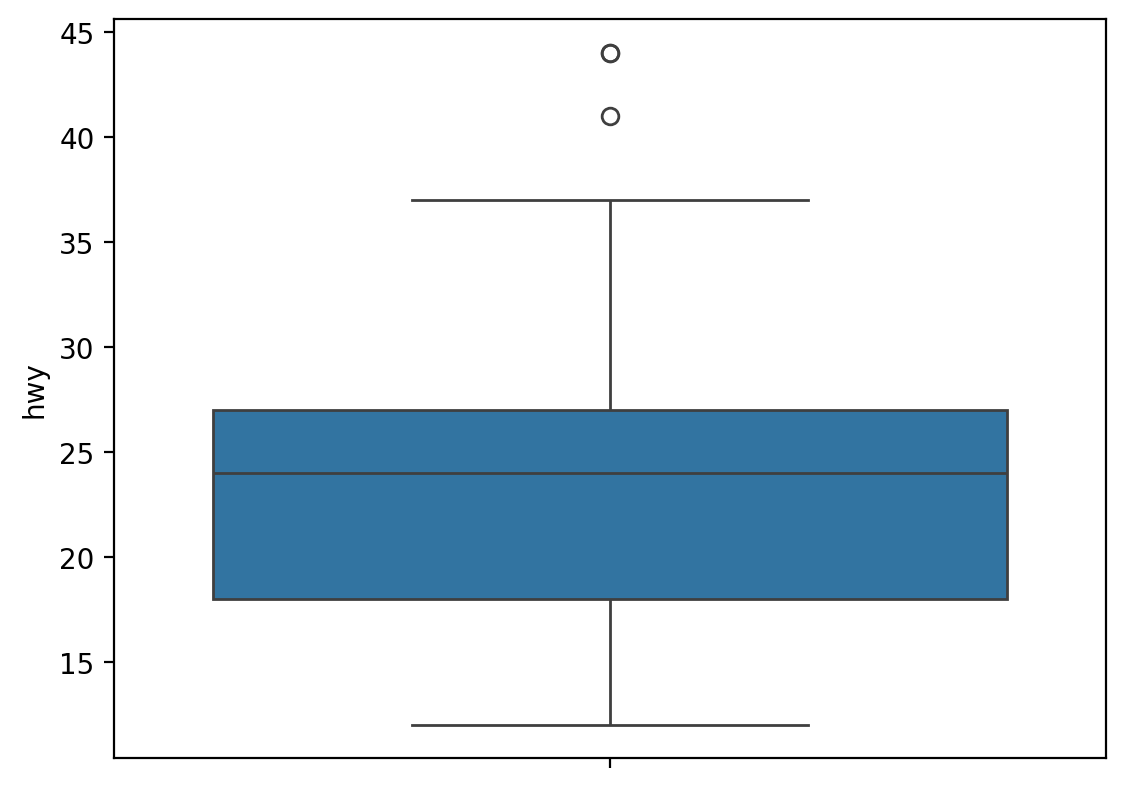

In [191]:
sns.boxplot(data = mpg, y='hwy');

![BoxplotDisc](https://blog.kakaocdn.net/dn/dDwo0c/btsGZlnG2OR/JKqvsOBYX8oRCutkvQkXSK/img.png)

In [192]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [193]:
s.quantile()

np.float64(3.0)

In [194]:
s.quantile(.5)

np.float64(3.0)

In [195]:
s.quantile([.5])

,0
0.5,3.0


In [196]:
s.quantile([0, .5, 1])

,0
0.0,1.0
0.5,3.0
1.0,5.0


In [197]:
s.quantile(np.arange(0,1.1,0.1))

,0
0.0,1.0
0.1,1.4
0.2,1.8
0.3,2.2
0.4,2.6
0.5,3.0
0.6,3.4
0.7,3.8
0.8,4.2
0.9,4.6


In [198]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [199]:
mpg.hwy.quantile(np.arange(0, 1.1, 0.25))

,hwy
0.00,12.0
0.25,18.0
0.50,24.0
0.75,27.0
1.00,44.0


In [200]:
a, b = [10, 20]

In [201]:
a

10

In [202]:
b

20

In [203]:
p25, p50, p75 = mpg.hwy.quantile(np.arange(0.25 ,1, 0.25)) #0.25, 0.5, 0,75
print(p25, p50, p75)

18.0 24.0 27.0


In [204]:
iqr = p75-p25

In [205]:
uf = p75 + 1.5 * iqr
uf

40.5

In [206]:
lf = p25 - (1.5 * iqr)
lf

4.5

In [207]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [208]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [209]:
mpg.hwy.describe()['25%']

np.float64(18.0)

In [210]:
mpg[mpg.hwy > uf]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [211]:
mpg[mpg.hwy > uf]['hwy']

,hwy
212,44
221,44
222,41


In [212]:
mpg[mpg.hwy < lf]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [213]:
mpg.isna().sum().sum()

np.int64(0)

In [214]:
mpg[(mpg.hwy > uf) | (mpg.hwy < lf)]['hwy']

,hwy
212,44
221,44
222,41


In [220]:
mpg['hwy'] = np.where((mpg.hwy > uf) | (mpg.hwy < lf), np.nan, mpg.hwy)
mpg[ mpg.hwy.isna() ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [221]:
mpg.shape

(234, 11)

In [222]:
len(mpg)

234

In [223]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [224]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [226]:
mpg.isna().sum().sum()

np.int64(3)

In [228]:
mpg = pd.read_csv("data/mpg.csv")
mpg.isna().sum().sum()

np.int64(0)

In [229]:
mpg[(mpg.hwy > uf) | (mpg.hwy < lf)]['hwy']

,hwy
212,44
221,44
222,41


In [230]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


## 7장 종료

# 8장 그래프

In [1]:
!pip install koreanize_matplotlib

In [2]:
%config InlineBackend.figure_format =  "retina"

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

In [8]:
# plt.rcParams.update({'font.family':'Margun Gothic'})
plt.rcParams.update({'figure.dpi':'100', 'figure.figsize':[4, 2.5]})

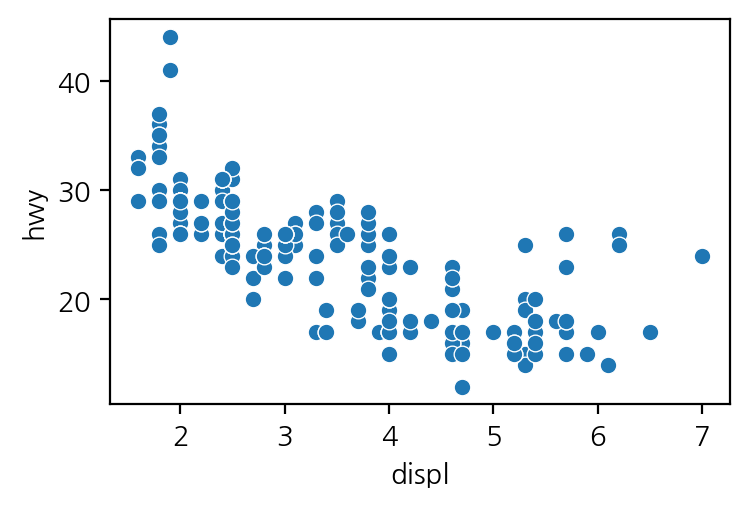

In [12]:
mpg = pd.read_csv("data/mpg.csv")

sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')
plt.show()


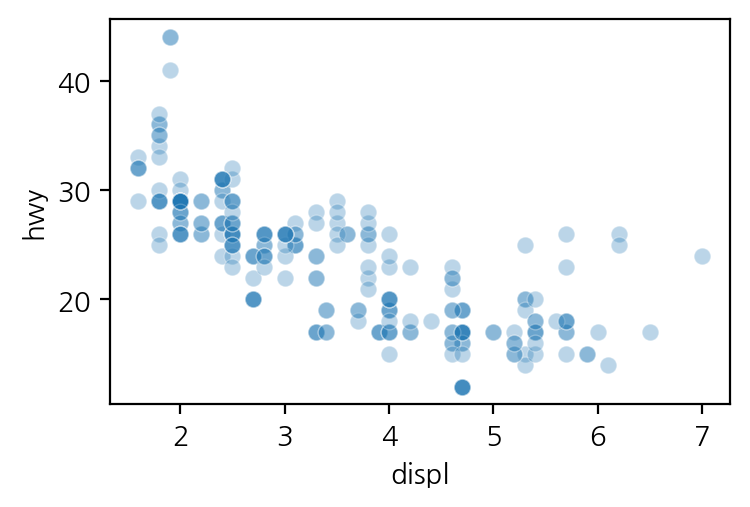

In [14]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha =.3);

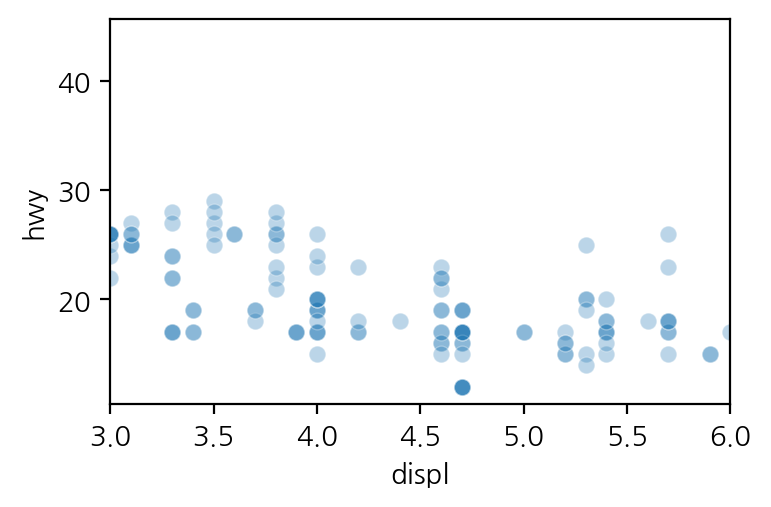

In [15]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha =.3).set(xlim=[3, 6]);


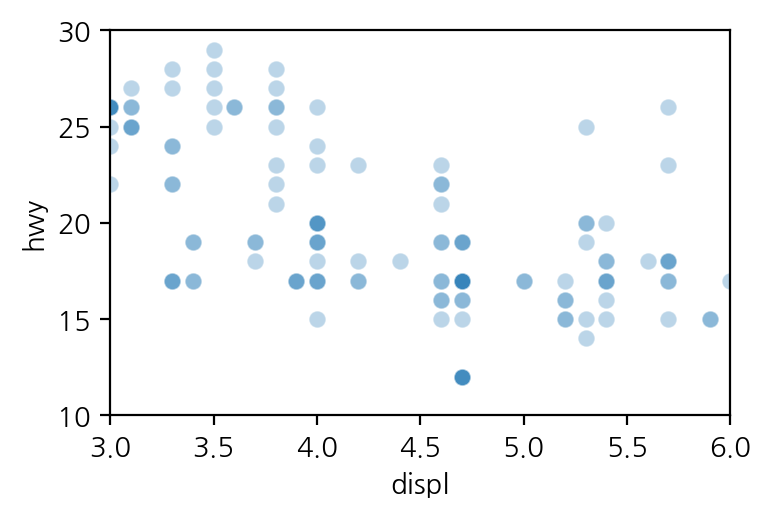

In [16]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha =.3).set(xlim=[3, 6], ylim = [10, 30]);


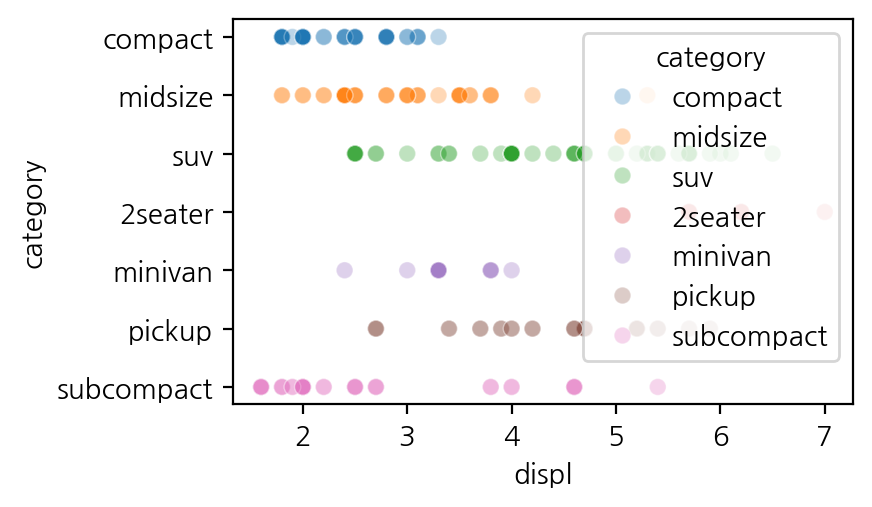

In [22]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');

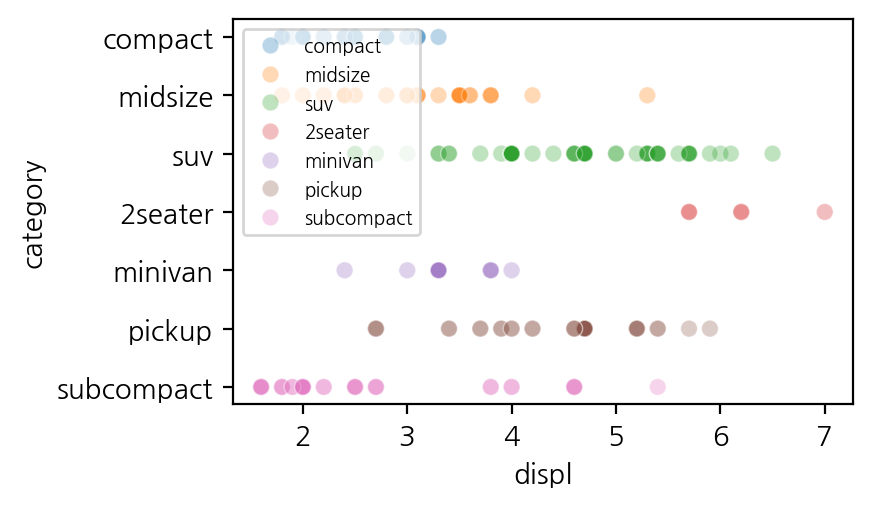

In [26]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(loc = 2, fontsize = 'x-small');

| 숫자 | 문자열(`str`)       | 위치 설명            |
| -- | ---------------- | ---------------- |
| 0  | `'best'`         | 가장 좋은 위치 (자동 선택) |
| 1  | `'upper right'`  | 오른쪽 위            |
| 2  | `'upper left'`   | 왼쪽 위             |
| 3  | `'lower left'`   | 왼쪽 아래            |
| 4  | `'lower right'`  | 오른쪽 아래           |
| 5  | `'right'`        | 오른쪽 중앙           |
| 6  | `'center left'`  | 왼쪽 중앙            |
| 7  | `'center right'` | 오른쪽 중앙           |
| 8  | `'lower center'` | 아래 중앙            |
| 9  | `'upper center'` | 위 중앙             |
| 10 | `'center'`       | 정중앙              |


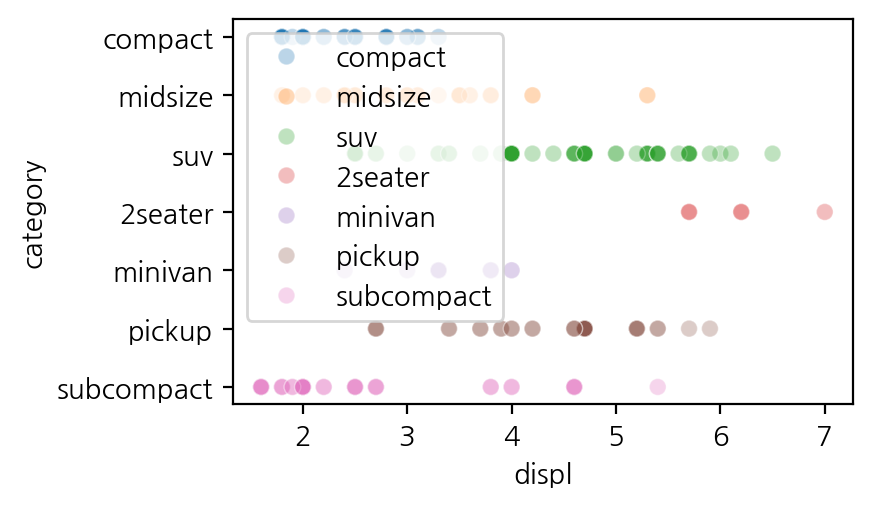

In [25]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(loc = 'upper left');

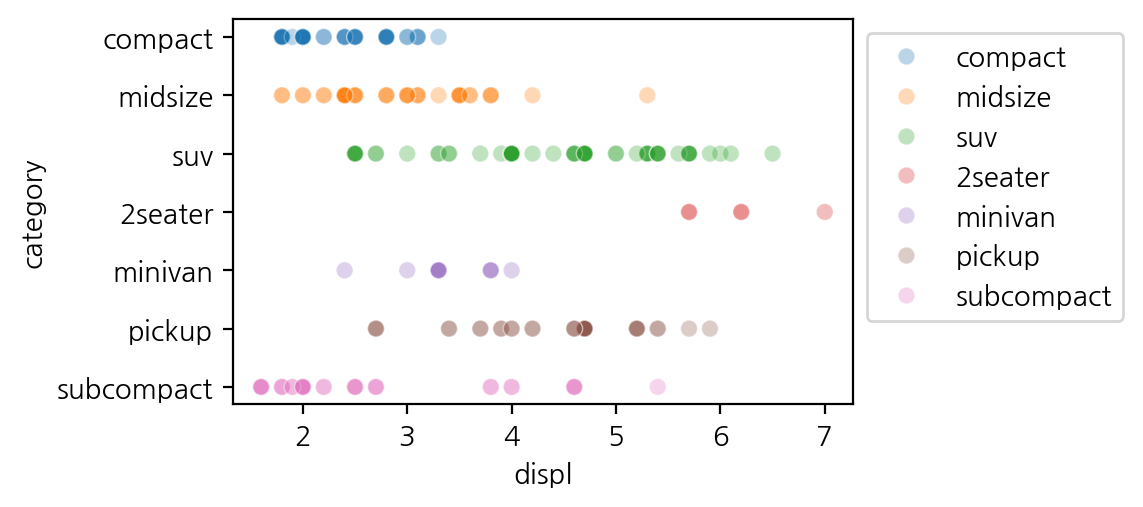

In [27]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(loc = 2, bbox_to_anchor=(1, 1));

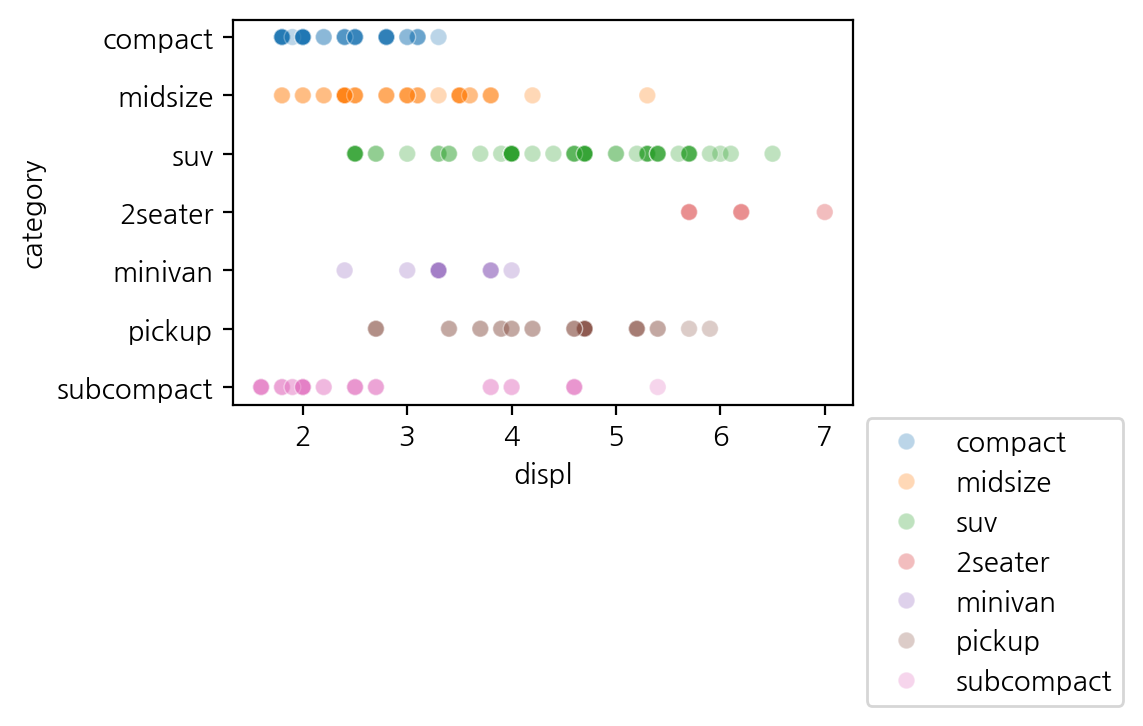

In [30]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(loc = 2, bbox_to_anchor=(1, 0));

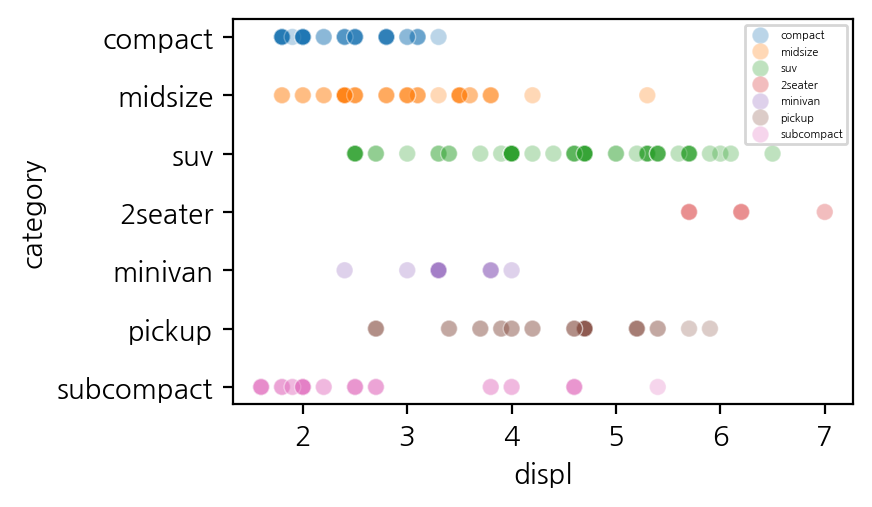

In [39]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(fontsize = 4);

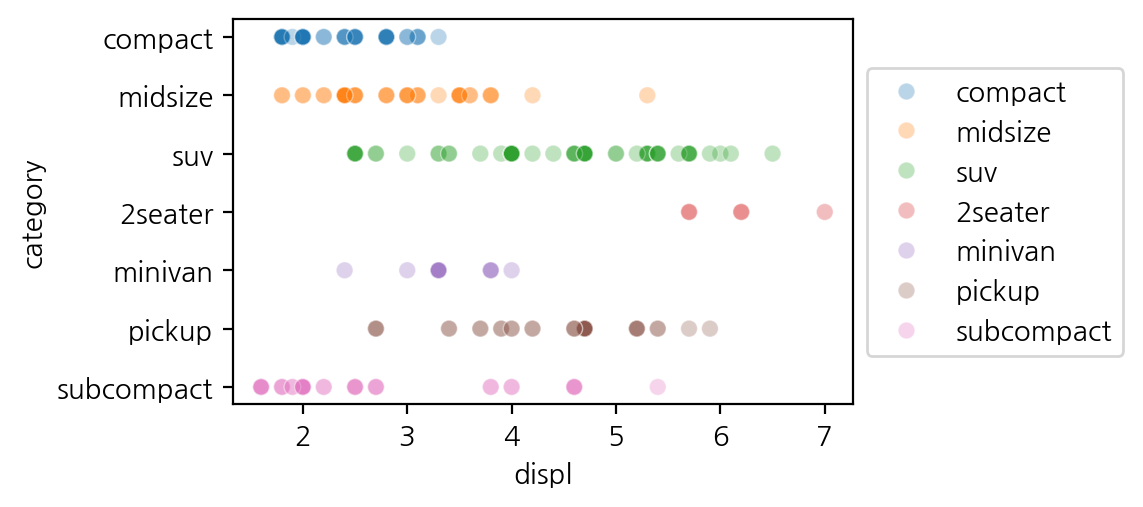

In [44]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(loc = 6, bbox_to_anchor=(1, 0.5));

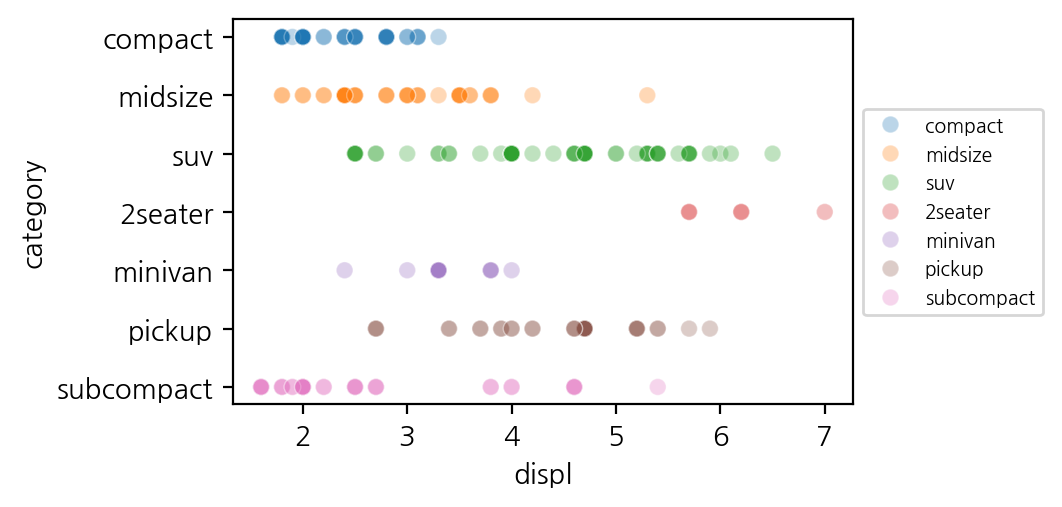

In [45]:
sns.scatterplot(data = mpg, x = 'displ', y = 'category', alpha =.3, hue = 'category');
plt.legend(loc = 6, bbox_to_anchor=(1, 0.5), fontsize = 7);

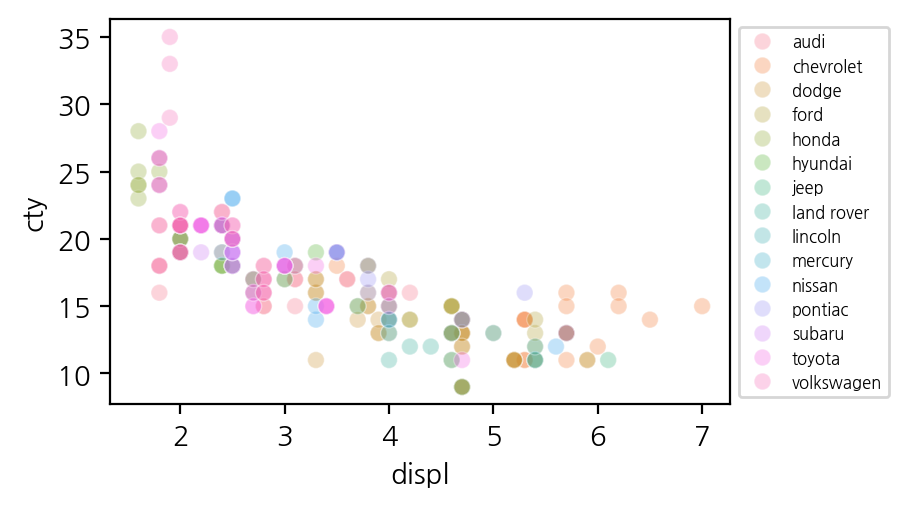

In [48]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', alpha =.3, hue = 'manufacturer');
plt.legend(loc = 6, bbox_to_anchor=(1, 0.5), fontsize = 6);

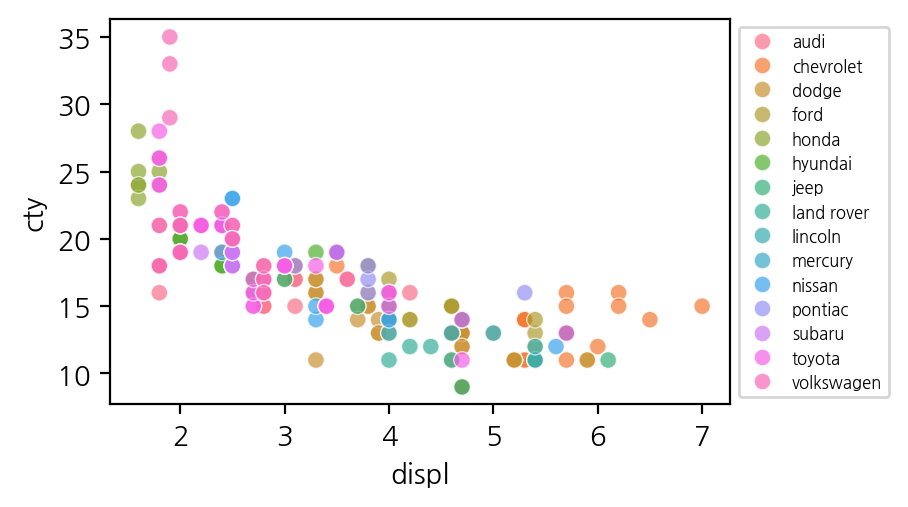

In [49]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', alpha =.7, hue = 'manufacturer');
plt.legend(loc = 6, bbox_to_anchor=(1, 0.5), fontsize = 6);

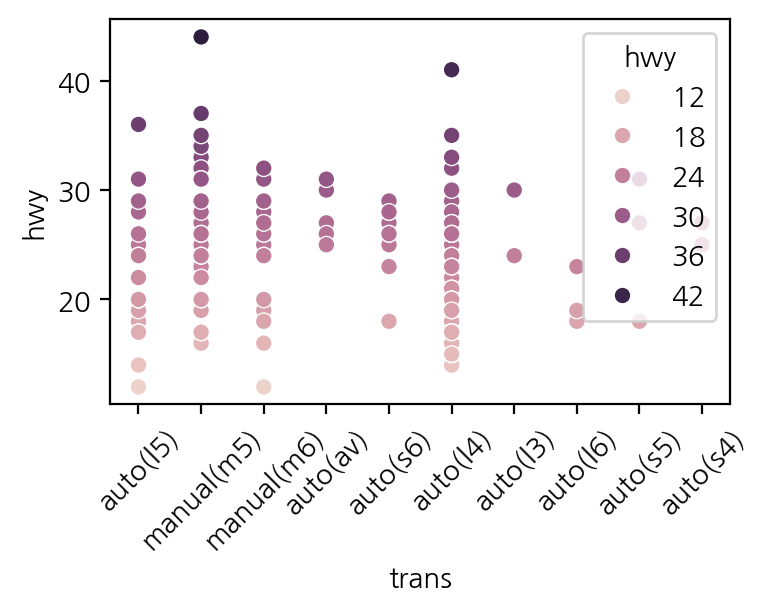

In [55]:
my = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my.tick_params(axis = 'x', labelrotation = 45);

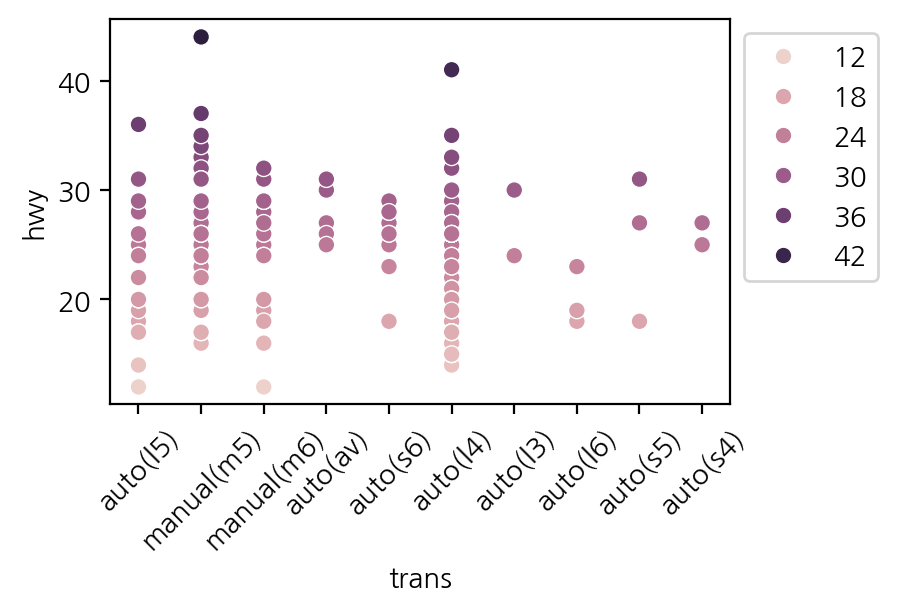

In [57]:
my = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my.tick_params(axis = 'x', labelrotation = 45);
my.legend(loc = 2, bbox_to_anchor = (1, 1));

## 종료